name: نام
year : سال
selling_price : فروش_قیمت
km_driven :
fuel : سوخت
seller_type : فروشنده_نوع
transmission : انتقال
owner : مالک
mileage : مسافت پیموده شده
engine : موتور
max_power : حداکثر_قدرت
torque : گشتاور
 seats :  صندلی ها

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/used_cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.shape
df.columns
df.dtypes
df.info()
df.describe()
df.describe(exclude=[np.number])
df.nunique()
df['fuel'].value_counts()
df['seller_type'].value_counts()
df['transmission'].value_counts()
df['owner'].value_counts()
df['seats'].value_counts()
df.duplicated().sum()
df.isnull().sum()
df.corr(numeric_only=True)


,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


In [4]:
df=df.drop(['torque'],axis=1)
df=df.drop(['name'],axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


### Drop Duplicated

In [5]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
df['mileage'] = df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
df.dtypes

,0
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64
max_power,float64


In [7]:
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())
df['max_power']=df['max_power'].fillna(df['max_power'].mean())
df['seats']=df['seats'].fillna(df['seats'].mean())
df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
max_power,0


In [8]:
from datetime import datetime

def car_age(year_of_manufacture):
    current_year = datetime.now().year
    age = current_year - year_of_manufacture
    return age

df["year"]=df["year"].apply(car_age)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,10,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,10,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,18,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,14,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,17,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [9]:
categorical_columns=["fuel","seller_type","transmission","owner","seats"]
labelencoder=LabelEncoder()
for column in categorical_columns:
  df[column]=labelencoder.fit_transform(df[column])
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,10,450000,145500,1,1,1,0,23.40,1248.0,74.00,2
1,10,370000,120000,1,1,1,2,21.14,1498.0,103.52,2
2,18,158000,140000,3,1,1,4,17.70,1497.0,78.00,2
3,14,225000,127000,1,1,1,0,23.00,1396.0,90.00,2
4,17,130000,120000,3,1,1,0,16.10,1298.0,88.20,2


### outliers Data

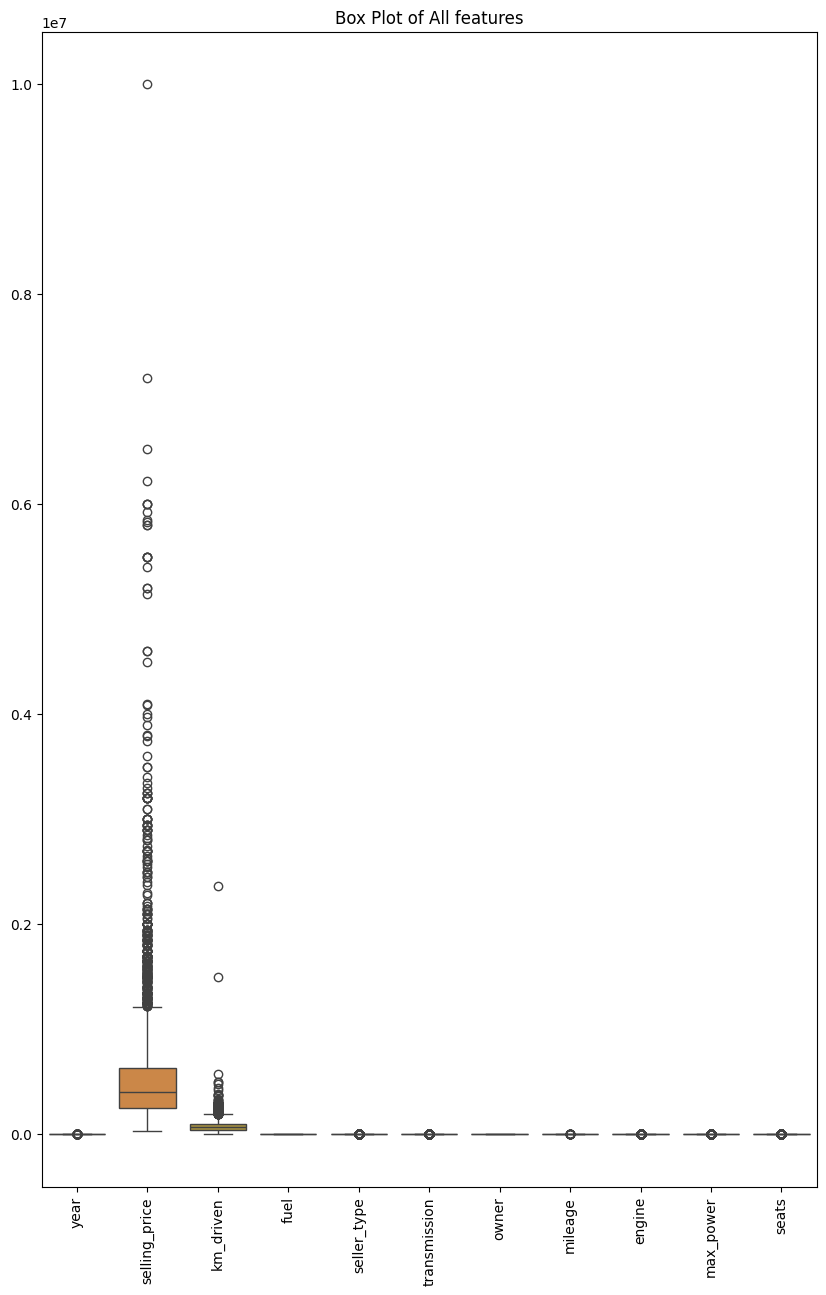

In [10]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of All features")
plt.show()

In [11]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return column[(column < lower_bound) | ( upper_bound < column)]

In [12]:
for i, column in enumerate(df.columns):
    outliers = find_outliers(df[column])
    if(outliers.size>0):
      print(f"outliers - {column} :\n{outliers.size}")

outliers - year :
31
outliers - selling_price :
256
outliers - km_driven :
81
outliers - seller_type :
708
outliers - transmission :
584
outliers - mileage :
18
outliers - engine :
995
outliers - max_power :
253
outliers - seats :
1667


In [13]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    df_remove = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_remove

In [14]:
df=remove_outliers(df)

In [15]:
for i, column in enumerate(df.columns):
    outliers = find_outliers(df[column])
    if(outliers.size>0):
      print(f"outliers - {column} :\n{outliers.size}")

outliers - selling_price :
20
outliers - mileage :
2
outliers - max_power :
28


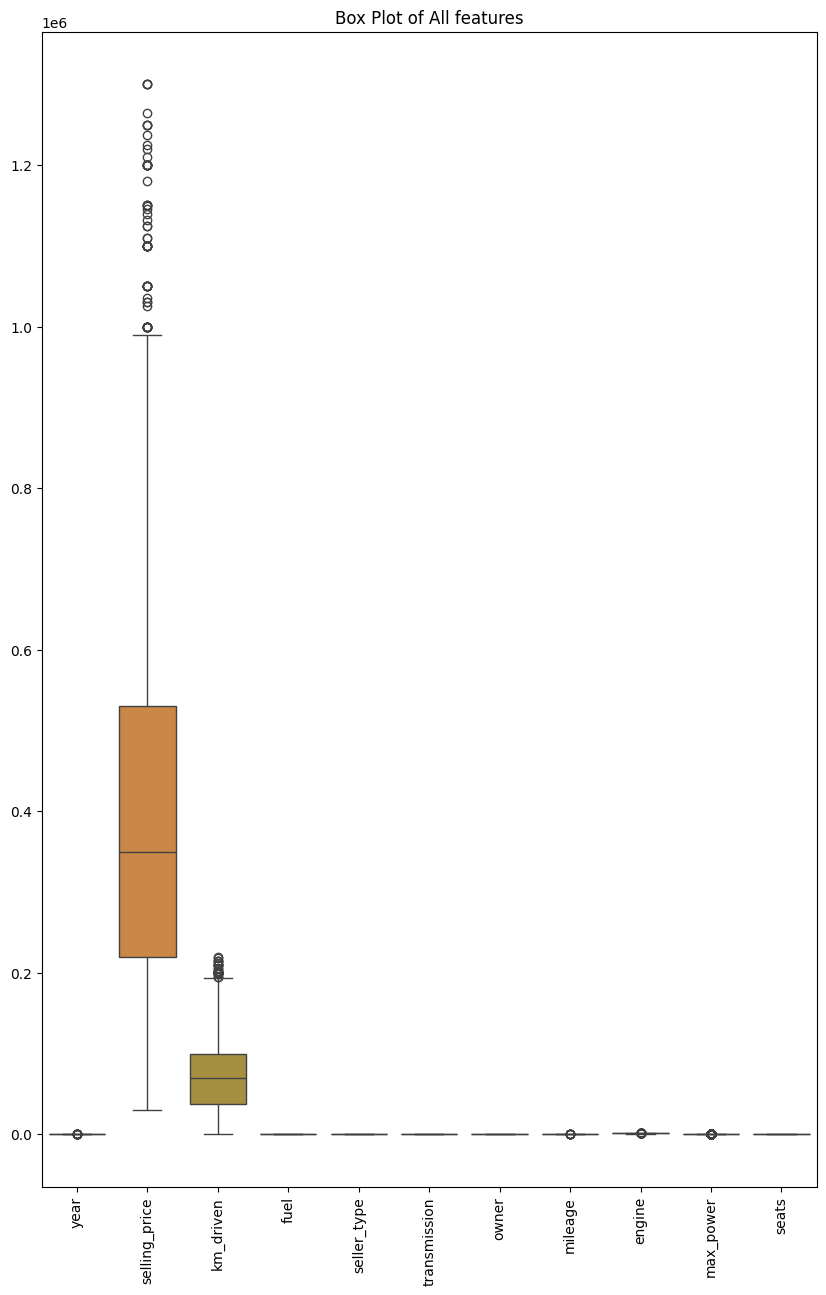

In [16]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of All features")
plt.show()

In [17]:
X=df.drop(['selling_price'],axis=1)
y=df['selling_price']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3420, 10), (856, 10), (3420,), (856,))

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train , X_test

(array([[-0.41242243, -1.60085316,  0.94677964, ..., -0.98894044,
         -0.60829807,  0.        ],
        [ 0.64570564, -1.30640573,  0.94677964, ..., -0.14737277,
         -0.25295096,  0.        ],
        [-0.94148647, -0.25130243, -1.02820443, ...,  1.46843715,
          2.45618225,  0.        ],
        ...,
        [ 0.64570564, -0.86473458,  0.94677964, ...,  1.11077089,
          2.03142332,  0.        ],
        [ 0.1166416 ,  0.23944329, -1.02820443, ...,  1.46843715,
          2.46239824,  0.        ],
        [ 0.1166416 ,  1.22093472, -1.02820443, ...,  0.06301915,
         -0.24777097,  0.        ]]),
 array([[ 0.38117362, -0.00592957, -1.02820443, ...,  0.06301915,
         -0.25087896,  0.        ],
        [ 0.38117362,  1.22093472, -1.02820443, ...,  0.06301915,
         -0.25295096,  0.        ],
        [ 0.38117362, -1.04876422,  0.94677964, ..., -0.15158061,
          0.21324787,  0.        ],
        ...,
        [ 1.70383372,  0.97556187, -1.02820443, ...,  

In [20]:
X_train = pd.DataFrame(X_train, columns=['year', 'km_driven', 'fuel', 'seller_type',
                                         'transmission', 'owner', 'mileage',
                                         'engine', 'max_power', 'seats'])

X_test = pd.DataFrame(X_test, columns=['year', 'km_driven', 'fuel', 'seller_type',
                                         'transmission', 'owner', 'mileage',
                                         'engine', 'max_power', 'seats'])

### Single Linear_Regression

In [31]:
X_train_single = X_train[['mileage']]
X_test_single = X_test[['mileage']]
model_single = LinearRegression()
model_single.fit(X_train_single, y_train)
y_pred_single = model_single.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)
print(f"Mean Squared Error : {mse_single}")
print(f"R-squared : {r2_single}")

Mean Squared Error : 43185626292.8249
R-squared : 0.15565386329301922


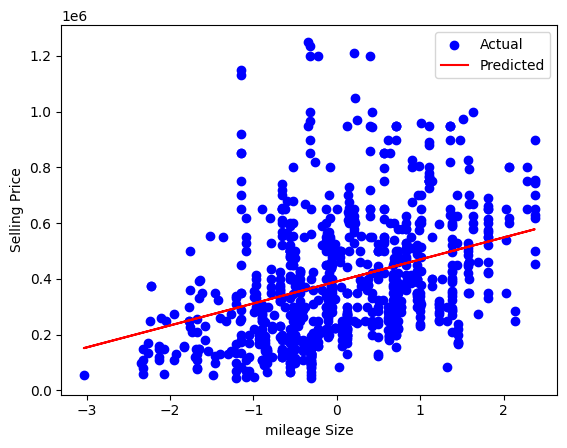

In [33]:
plt.scatter(X_test_single, y_test, color='blue', label='Actual')
plt.plot(X_test_single, y_pred_single, color='red', label='Predicted')
plt.xlabel('mileage Size')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

### Multi_Linear_Regression

In [34]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Mean Squared Error : {mse_multi}")
print(f"R-squared : {r2_multi}")

Mean Squared Error : 14175990005.09755
R-squared : 0.7228373553357599


### Polynominal_Regression

In [39]:
from sklearn.pipeline import make_pipeline
degree = 2
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Mean Squared Error : {mse_poly}")
print(f"R-squared : {r2_poly}")

Mean Squared Error : 8993724700.864208
R-squared : 0.8241586991400767


### Lasso_Regression

In [40]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Mean Squared Error : {mse_lasso}")
print(f"R-squared : {r2_lasso}")

Mean Squared Error : 14175996789.439423
R-squared : 0.7228372226913284


### Ridge_Regression

In [41]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Mean Squared Error : {mse_ridge}")
print(f"R-squared : {r2_ridge}")

Mean Squared Error : 14176779972.120127
R-squared : 0.7228219102522704


### Elastic_Regression_Modle

In [42]:
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"Mean Squared Error : {mse_elastic}")
print(f"R-squared : {r2_elastic}")

Mean Squared Error : 14366004506.201149
R-squared : 0.7191222764148879


### مقایسٍه نتایج به دست آمده از مدلهای مختلف از طریق رسم نمودار   

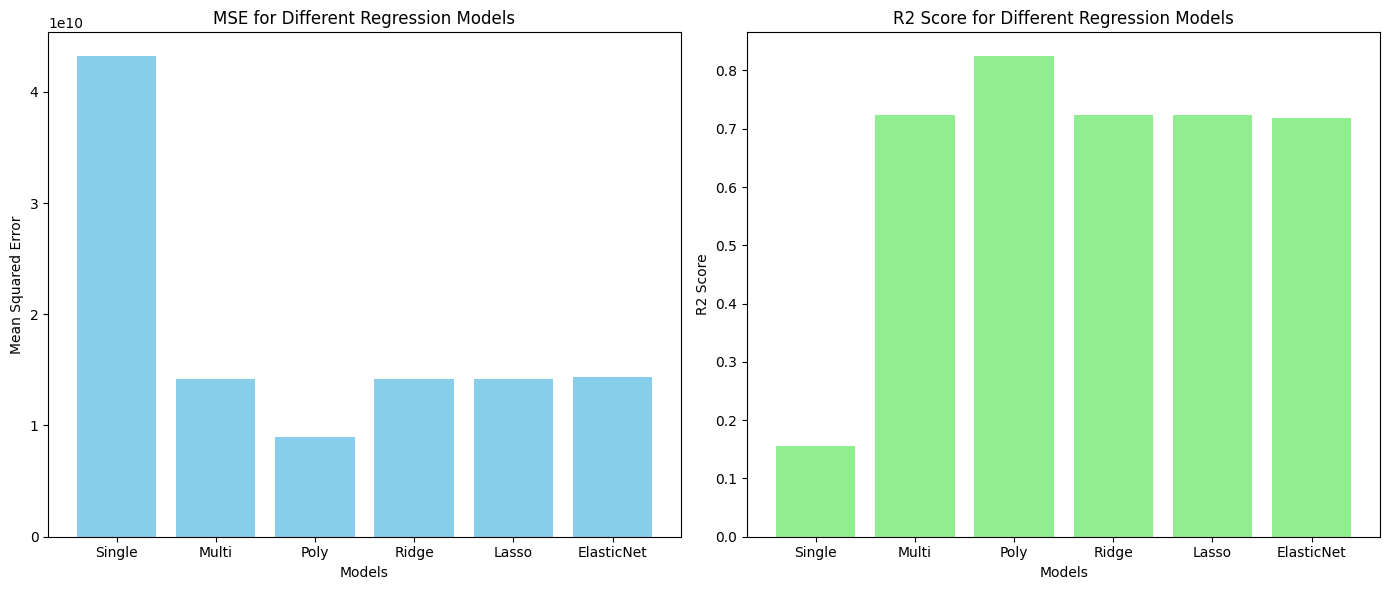

In [43]:
models = ['Single', 'Multi', 'Poly', 'Ridge', 'Lasso', 'ElasticNet']
mse_values = [mse_single, mse_multi, mse_poly, mse_ridge, mse_lasso, mse_elastic]
r2_values = [r2_single, r2_multi, r2_poly, r2_ridge, r2_lasso, r2_elastic]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('MSE for Different Regression Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R2 Score for Different Regression Models')
plt.ylabel('R2 Score')
plt.xlabel('Models')

plt.tight_layout()
plt.show()